In [17]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# 오토인코더란?
입력값을 압축시킨 후, 압축된 정보를 다시 복원하여 값을 출력하는 비지도 학습 딥러닝 모델입니다. 오토인코더는 학습 과정을 통해 출력값이 최대한 입력값과 일치하도록 파라미터가 최적화됩니다. 오토인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어, 주로 차원 축소의 목적으로 오토인코더가 많이 사용됩니다.

In [18]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=250)

# 오토인코더 실습 
이번 실습을 통해 MNIST 손글씨를 오토인코더를 활용하여 차원축소해보겠습니다.

# MNIST 데이터 획득
MNIST 데이터는 아래의 코드를 실행하여 획득하실 수 있습니다.

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# MNIST 데이터 전처리
획득된 학습데이터는 오토인코더에 사용합니다. 테스트 데이터 중 300개의 데이터만 선택하여 데이터 시각화에 사용하도록 하겠습니다.

In [20]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# 오토인코더 다이어그램
텐서플로우로 구현할 오토인코더는 아래 그림과 같습니다.

In [21]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", width=500, height=250)

# 텐서플로우 모델 만들기
아래의 코드를 실행하여 텐서플로우 모델을 만듭니다. 손실함수는 입력값과 출력값의 차이를 최소화하는 것으로 설정된 것을 확인할 수 있습니다.

In [22]:
# input
_input = tf.placeholder(tf.float32, [None, 28*28])    # value in the range of (0, 1)
# encoder
encoder = tf.layers.dense(_input, 128, tf.nn.tanh)
# bottleneck
bottleneck = tf.layers.dense(encoder, 3)
# decoder
decoder = tf.layers.dense(bottleneck, 128, tf.nn.tanh)
#output
_output = tf.layers.dense(decoder, 28*28, tf.nn.sigmoid)
# loss function
loss = tf.losses.mean_squared_error(labels=_input, predictions=_output)
# optimizor
train = tf.train.AdamOptimizer(0.002).minimize(loss)

# 학습

In [23]:
tf.set_random_seed(777)

# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 50
batch_size = 5000
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    print("train start...")
    for epoch in range(epoch_cnt):
        avg_loss = 0.0
        start = 0; end = batch_size
        for i in range(iteration):
            _, loss_ = sess.run([train, loss], 
                               feed_dict={_input: x_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss_ / iteration
        print("epoch : "+str(epoch)+ " , train loss : "+str(avg_loss))
    # take compressed vector
    _bottleneck = sess.run(bottleneck, {_input: x_test})

train start...
epoch : 0 , train loss : 0.16604874841868877
epoch : 1 , train loss : 0.07232566302021345
epoch : 2 , train loss : 0.06797617984314759
epoch : 3 , train loss : 0.06689914626379807
epoch : 4 , train loss : 0.06507746068139872
epoch : 5 , train loss : 0.06214348382006088
epoch : 6 , train loss : 0.0597748514264822
epoch : 7 , train loss : 0.05847615841776133
epoch : 8 , train loss : 0.05759758191804092
epoch : 9 , train loss : 0.05684183382739624
epoch : 10 , train loss : 0.056114332439998776
epoch : 11 , train loss : 0.0554058151319623
epoch : 12 , train loss : 0.05474921812613805
epoch : 13 , train loss : 0.054161249349514634
epoch : 14 , train loss : 0.05362301195661227
epoch : 15 , train loss : 0.05311353504657746
epoch : 16 , train loss : 0.05262414800624052
epoch : 17 , train loss : 0.05215308473755916
epoch : 18 , train loss : 0.051699105960627385
epoch : 19 , train loss : 0.05126009446879229
epoch : 20 , train loss : 0.05083519592881203
epoch : 21 , train loss : 0.

# 데이터 시각화
압축된 데이터를 사용하여 3d 챠트에 시각화하도록 하겠습니다.

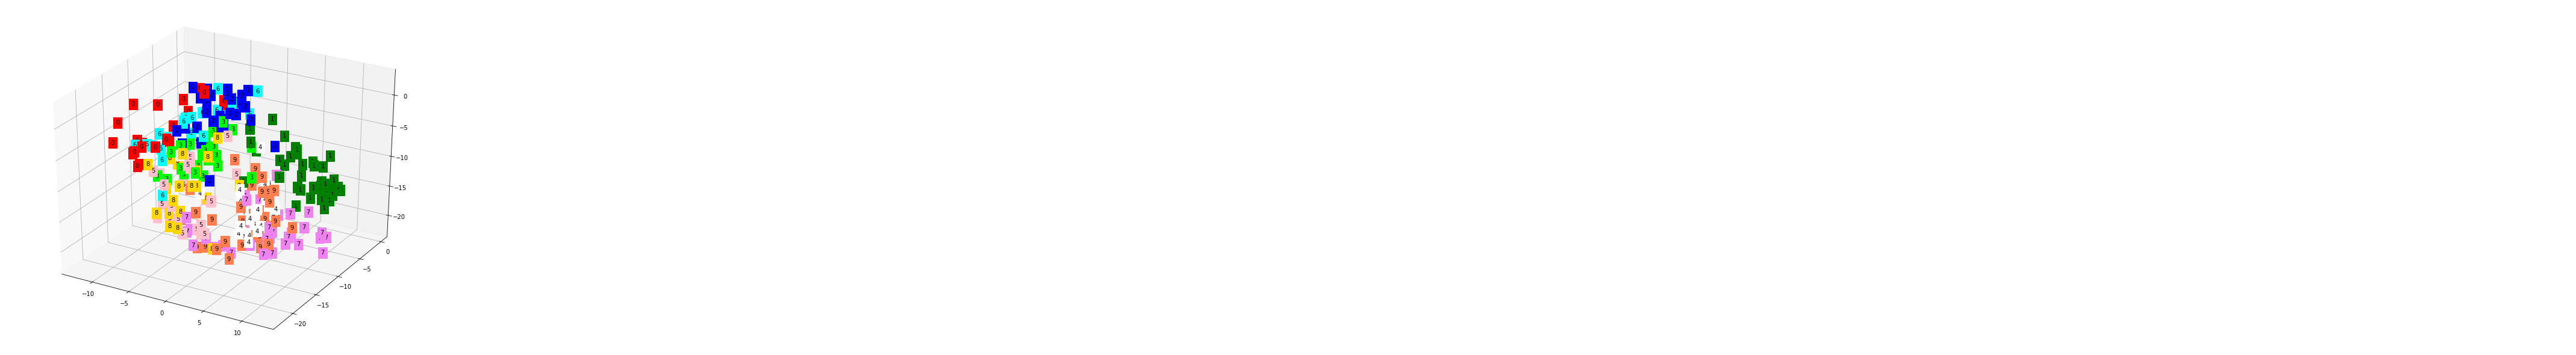

In [24]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = _bottleneck[:, 0]
ys = _bottleneck[:, 1]
zs = _bottleneck[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()